# Regression Trees
### Economics 588
##### Jacob Van Leeuwen, John Bonney, Erik Webb, Taylor Landon, Rachel Bagnall, Scott Elliott, Jaimie Choi, Isaac Riley

## Introduction

Prediction trees are a particular kind of nonlinear predictive model. There are two varieties: regression trees and classification trees. Of course, we will be focused on regression trees. We use linear regression as a method of making quantitative predictions. However, linear regressions do not do well with a nonlinear models. A solution to this problem can be to partition the data into smaller regions where we are able to have more manageable linear interactions. We can recursively subdivide the partitions until we get extremely manageable pieces that can be estimated with simple regression models. This process is known as recursive partitioning. Hence, we use recursive partitioning to sort the data into small, manageable sections and then use a simple model for each part of the partition. 

We can represent the recursive partitioning process using a regression tree. Thus, each terminal node of the regression tree represents a part of the partition that has an estimate found using a simple model. The estimate found applies only to the specific partition. We navigate the tree by asking a sequence of questions about specific features for some point, x. Each question, usually refers to only a single attribute with a yes or no answer. For example, a question of the type could concern gender of the observation (i.e. is the observation male or not). The variables can be either continuous or discrete (but ordered). 

For classic regression trees, the model in each cell is just a constant estimate of Y. That is, suppose the points (x1,y1), (x2,y2), …, (xc,yc) are all the samples belonging to the node x. Then our model for x is: $$\hat{y}=\frac{1}{c} \sum_{i=1}^{c}y_i$$ This is the sample mean of the dependent variable in that cell. This is a piecewise-constant model. There are several advantages to the piecewise-constant model:
					
1. Making predictions is fast, since the calculation process is not complicated
2. It’s easy to understand what variables are important in prediction (look at the tree)
3. If some data is missing, we might not be able to go all the way down the tree to a leaf, but we can still make a prediction by averaging all the leaves in the subtree we do reach
4. The model gives a jagged response, so it can work when the true regression surface is not smooth. If it is smooth, though, the piecewise-constant surface can approximate it arbitrarily closely (with enough leaves)
5. There are fast, reliable algorithms to learn these trees 						

One of the problems with recursive partitioning is that we need to balance the informativeness of the partitions with parsimony, so as to not just put every point in its own partition. Similarly, we could just end up putting every point in its own leaf-node, which would not be very useful. A typical stopping criterion is to stop growing the tree when further splits gives less than some minimal amount of extra information, or when they would result in nodes containing less than a small percentage of the total data.  

Regression trees can be used to address problems in which we want to predict the value of a continuous variable from a set of continuous and/or categorical variables. 

Examples:

Health (Type II Diabetes)
* Does increasing sugar Consumption (avg. grams per day) affect whether you develop type II diabetes? (continuous) 
* How does increasing weight affect whether you develop type II diabetes? (continuous)
* Number of days per week with greater than 30 minutes of exercise (categorical) 
* Age (continuous)
* Parent has diabetes (categorical) 
* Hours worked/week (continuous)

Election outcomes (voter-share) (continuous)
* What State/Region tends to have greater voter-share? (categorical)
* How much does Campaign spending affect voter-share? (continuous)
* Incumbent (categorical)
* Political Party (categorical)
* GDP Growth (continuous)
* General vs. Midterm Election (categorical)

Selling prices of single family homes (continuous)
* Does increasing Square footage increase prices for single family homes? (continuous)
* How much do the Style of home affect the selling price of single family homes? (categorical)
* Zip code/county/state/etc. (categorical)
* Median income of neighborhood/zip code (if area variable is larger than zip code) (continuous)


## Analytical Framework

The basic idea behind regression trees is that each good factor (variable in ML) can be used to make a "decision" about the likelihood of an outcome. Each split is called a _node_.

For example, to predict whether a customer will buy a certain kind of computer, we might use the following simple decision tree:

If we have enough data, we can use to train a model that will be able to use the same general idea to predict outcomes given new (similar) data.

### The Algorithm

The goal of the regression tree model is to minimize the sum of squared residuals, as in OLS regression. However, in the regression tree model, we are minimizing the sum of squared residuals for a given tree T.
The sum of squared residuals for a tree T is $$S=\sum_{c\in terminal nodes(T)}\sum_{i\in C}(y_i-m_c)^2$$ where $m_c=\frac{1}{n_c}\sum_{i\in C}y_i$, the prediction for leaf c. We make our splits to minimize S.

The Algorithm:
1. Start with a single node containing all points. Calculate $m_c$ and S. 
2. If all the points in the node have the same value for all the independent variables, stop. Otherwise, search over all binary splits of all variables for the one which will reduce S as much as possible. IF the largest decrease in S would be less than some threshold delta, or one of the resulting nodes would contain less than q points, stop. Otherwise, take that split, creating two new nodes.
3. In each new node, go back to step 1. 

A more successful approach to finding regression trees uses the idea of cross-validation. We randomly divide our data into a training set and a testing set, (say, 50% training and 50% testing). We then apply the basic tree-growing algorithm to the training data only, with q = 1 and δ = 0 — that is, we grow the largest tree we can. This is generally going to be too large and will over-fit the data. We then use cross-validation to prune the tree. At each pair of terminal nodes with a common parent, we evaluate the error on the testing data, and see whether the sum of squares would be smaller by remove those two nodes and making their parent a terminal node. This is repeated until pruning no longer improves the error on the testing data. 


### Key Concept: Gini Impurity

For now, we will start with the simplest case: a classification problem with two outcomes. A common example uses a dataset of passengers on the Titanic to predict who survives.

Ideally, we want factors that are as predictive as possible. If men and women are equally likely to survive, the variable can't tell us much (barring interaction with other variables). Fortunately (depending on your perspective, but at least for prediction purposes), it turns out women are more likely than men to survive, so _sex_ will be an important factor in our tree.

That means that a node splitting on _sex_ has relatively low Gini impurity. Gini impurity measures the frequency of mislabeling a randomly selected element if it was randomly labeled by the distributions of labels in the subset. A factor with high purity is very predictive of the outcome. Conversely, the impurity of a node would be maximized if equal proportions of its values (males and females here) survived.

Gini impurity is formally defined as:

$$Gini_{i} = 1 - \sum_{k=1}^{n}{p_{i,k}^2}$$

For example, if it were the case that 70% of the survivors were females, the Gini impurity of the _sex_ node would be: 

$$1-0.3^2-0.7^2 = 0.42$$

Notice that 0.42 is medium probability of mislabelling 

Now suppose that 50% of the survivors were males, the Gini impurity of the _sex_node would be: 

$$1-0.5^2-0.5^2 = 0.5$$

Notice here that the Gini impurity probability increased when splitting gender by 50 percent.

Finally, suppose that only 10% of the survivors were females 

$$1-0.1^2-0.9^2 = 0.18$$

Here, the huge disproportionate categorization allows Gini index to be very low, suggesting very low impurity 

In general, it makes sense to grow a tree **greedily** - starting with the least impure feature splits, then moving to the next least impure.


Overfitting is a major concern with regression trees - you might get great scores within your training set, but then find that it generalizes poorly. As is often the case with decision trees, there is a tradeoff between bias, variance, and overfitting. The shallower the tree, the greater the bias and variance, but this may be preferable to overfitting. There are several hyperparameters you can include in the model to keep this from happening, such as:

max depth

min_samples_split

min_samples_leaf

min_weight_fraction_leaf

max_leaf_nodes

### Pros and Cons of Regression Trees

Regression trees are among the easiest to visualize of ML models. They are intuitive and not hard to explain, even to someone with little econometrics training. They are computationally efficient and don't have the same problems with missing values, non-numerical or cateorical data, and collinearity.

On the downside, they often don't have the highest accuracy in prediction and can be sensitive to minor changes in data. One way to overcome these weaknesses is to use multiple decision trees aggregated (random forests, boosting) or in conjunction with other models (stacking).

## Example
#### Housing Prices: A Kaggle Dataset

The training dataset contains 1460 observations and 80 features. Let's start by calling packages needed for our analysis.

In [38]:
# Core Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ML Packages
from sklearn.linear_model import SGDRegressor, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer, f1_score, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# ML Packages
from sklearn.metrics import mean_squared_error, make_scorer, f1_score, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Other Packages
import graphviz 
from sklearn import tree

ModuleNotFoundError: No module named 'graphviz'

After downloading necessary packages, we divide our sample into our training and test datasets.

In [ ]:
train_location = "train.csv"
test_location = "test.csv"

train = pd.read_csv(train_location)
test = pd.read_csv(test_location)

To better understand what our data looks like, we look at a small subset of the training data to understand our data format.

In [ ]:
train.head()

We'll remove 'SalePrice' and 'Id' from the training dataset and log-transform 'SalePrice', which is our target variable of interest. 

In [ ]:
target = train['SalePrice']
target_transformed = np.log(target)

train = train.drop(['SalePrice', 'Id'], axis = 1)

### 1. Data Cleaning 

Before we start cleaning, let's develop a better understanding of what the data looks like. It looks like we have information about almost every aspect of a home (and its surrounding property) you could imagine, from commonly cited measures like square-feet and number of bedrooms to more detailed  metrics like the height of the basement or the masonry veneer type. Note that the final column is 'SalePrice', which is the variable we seek to predict. 

Below is a categorization of the features within the following categories: Sales, General, Location, Property, Interior, Basement, Utilities, Garage, and Exterior. This categorization is a subjective exercise, but it allowed me to become more familiar with the features and create general buckets within the dataset.  

**Sale**
- SalePrice: the property's sale price in dollars
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

**General**
- MSSubClass: The building class
- MSZoning: The general zoning classification
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Dollar Value of miscellaneous feature

**Location**
- Street: Type of road access
- Alley: Type of alley access
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- LotFrontage: Linear feet of street connected to property

**Property**
- LotArea: Lot size in square feet
- LotShape: General shape of property
- LandContour: Flatness of the property
- LotConfig: Lot configuration
- LandSlope: Slope of property

**Interior**
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality

**Basement**
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms

**Utilities**
- Utilities: Type of utilities available
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system

**Garage**
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition

**Exterior**
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality

Note that these features are a mix of continuous (Lot Area, Year Built, Bedrooms) and categorical (House Style, Roof Style, Garage Type) variables. 

Let's start cleaning by checking for missing values. Below we find the number of missing values for each feature, for features with missing values. 

In [40]:
# Find the number of missing values for each feature, including only those greater than 0. 
missing_values = pd.DataFrame(train.isnull().sum())
missing_values = missing_values[(missing_values > 0).any(axis=1)]

# Sort the values in ascending order. 
missing_values = missing_values.sort_values(by = 0, ascending = False)
missing_values.columns = ['Number of Missing Values']

# Calculate 'Percent Missing'
missing_values['Percent Missing'] = missing_values['Number of Missing Values']/len(train)
missing_values

,Number of Missing Values,Percent Missing
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


19 of the 80 features are missing 1 or more value. However, the degree to which values are missing varies widely across the 19 variables. Only 7 of the 1460 properties have information about pool quality ('PoolQC') while only 1 property is missing information about the property's electrical system. 

We'll drop 'Alley', 'FireplaceQu', 'PoolQC', 'PoolArea', 'Fence', and 'MiscFeature' from our dataset, since most observations do not have information for those variables.

In [41]:
train = train.drop(['MiscFeature', 'Fence', 'PoolQC', 'PoolArea', 'FireplaceQu', 'Alley'], axis = 1)

What about the others? Let's fill them in with the average of the feature if the feature is continuous or with the mode if the feature is categorical. 

In [42]:
for feature in train:
   # Features with a 'dtype' of O are categorical 
    if train[feature].dtype == 'O':
       train[feature] = train[feature].fillna(train[feature].mode()[0])

for feature in train:
   # Features with a 'dtype' of i or are floats are continuous
    if train[feature].dtype == np.float64 or train[feature].dtype == 'i':
       train[feature] = train[feature].fillna(train[feature].mean())

Let's confirm there aren't any remaining missing values.

In [43]:
# Should return 'False'
train.isnull().any().any()

False

We next look at outliers. To start, we'll explicitly determine which of our features are categorical and which are continuous.

In [44]:
# Create two empty lists
continuous_features = []
categorical_features = []

# Seperate features by dtype
for feature in train.columns:
    if train[feature].dtype == "object":
        categorical_features.append(feature)
    else:
        continuous_features.append(feature)
        
print("Number of Continuous Features:", len(continuous_features), "\nNumber of Categorical Features:", len(categorical_features))

Number of Continuous Features: 35 
Number of Categorical Features: 38


We'll use this to filter outliers according to a simple rule: 

For each column we compute the z-score of each value in the column relative to the column mean and standard deviation. Since the direction of the difference is irrelevant, we take the absolute value. Here we remove rows that contain a (continuous) feature value greater than 5 standard deviations away from the standardized mean. 

This code below was adapted from [this](https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-dataframe) Stack Overflow article.

In [45]:
n_std = 5
len(train) - len(train[train[continuous_features].apply(lambda x: np.abs(x - x.mean()) / x.std() < n_std).all(axis=1)])

86

In doing so we drop 86 rows of our training data. We can adjust this threshold later to see if it affects our mean squared error.

In [46]:
# Drop rows in training set (and target) according to the rule described above
target_transformed = target_transformed[train[continuous_features].apply(lambda x: np.abs(x - x.mean()) / x.std() < 10).all(axis=1)]
train = train[train[continuous_features].apply(lambda x: np.abs(x - x.mean()) / x.std() < 10).all(axis=1)]

The final step of the cleaning process is to create dummy variables for the categorical features. 

In [47]:
train_no_dummies = train
train = pd.get_dummies(train)

We apply the same changes we made, cleaning missing values, checking for outliers, and getting dummies for the test data.

In [48]:
test = test.drop(['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley'], axis = 1)

for feature in test:
    # Features with a 'dtype' of O are categorical 
   if test[feature].dtype == 'O':
       test[feature] = test[feature].fillna(test[feature].mode()[0])
for feature in test:
    # Features with a 'dtype' of i or are floats are continuous
    if test[feature].dtype == np.float64 or test[feature].dtype == 'i':
       test[feature] = test[feature].fillna(test[feature].mean())

# Only keep columns in test that are also found in train
test = test.reindex(columns = train.columns, fill_value=0)

test_no_dummies = test
test = pd.get_dummies(test)

### 2. Data Exploration & Visualization 

With the data cleaned we're now ready to explore the data. We begin by calculating the correlations for all of the continuous features and ranking them from -1 to 1.

In [49]:
# Filter out categorical variables
values = []
df = train[continuous_features]

# Iterate over each continous feature and calcualte its correlation with the target
for feature in df.columns:
    values.append([feature, df[feature].corr(target_transformed)])
    
# Sort the values and present them in a Pandas Dataframe
values = sorted(values, key=lambda x: x[1])
correlations = pd.DataFrame(values, columns = ['Feature', 'Correlation with SalePrice'])
correlations.tail()

,Feature,Correlation with SalePrice
30,TotalBsmtSF,0.642681
31,GarageArea,0.656542
32,GarageCars,0.681622
33,GrLivArea,0.718890
34,OverallQual,0.820278


It looks like 'OverallQual', 'GrLivArea' 'GarageCars', 'GarageArea', 'TotalBsmtSF' and '1stFlrSF' are moderately to highly correlated with 'SalePrice'. We'll need to examine the coefficients on these features when we do model fitting later on.

### 3. Model Fitting & Evaluation

In our modeling, we will use the technigues described in the analytical framework to estimate a regression tree model that estimates the log of hose prices for homes in the Kaggle dataset. We will estimate both a full regression tree that includes all possible variables, as well as a simpler regression tree that gives a better visual and conceptual representation of how regression trees work. 

#### Full Regression Tree

First, we begin by scaling the training and test data and confirming that the matrices have the correct shape.

In [50]:
# Scale the training data
scaler = StandardScaler()
scaler.fit(train)
scaled_train_df = scaler.transform(train)

# Scale the test data
scaler.fit(test)
scaled_test_df = scaler.transform(test)

If the data sets are correctly shaped, the training and test sets should have the same number of columns

In [51]:
print(target_transformed.shape, scaled_train_df.shape, scaled_test_df.shape)

(1443,) (1443, 267) (1459, 267)


We prepare our testing and training datasets for our regression tree model, and we determine the best parameters to use in our analysis using a grid search cross-validation method. We also fit our model to the training data, and generate predictions for both the training data and the test data. We also report what hyperparameters we use based on our cross validation.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(scaled_train_df, target_transformed, test_size=0.33, random_state=42)

param_dist = {"min_samples_leaf": [3, 5, 8], "max_depth": [15, 20, 25, 30]}
model = DecisionTreeRegressor()
dt = GridSearchCV(model, param_grid=param_dist, scoring='neg_mean_squared_error')

dt.fit(X_train, y_train)
dt_train_predictions = dt.predict(X_train)
dt_test_predictions = dt.predict(X_test)
print("Best Params: {}".format(dt.best_params_))

Best Params: {'max_depth': 25, 'min_samples_leaf': 5}


#### Small Regression Tree

We replicate the full decision tree with a subset of the variables to show a more concise and easy to understand example of how regression trees work. In particular, we use a subset of variables that are likely to be the most salient for homebuyers to consider when purchasing a home. The variables we include are total square footage, overall quality, overall condition, lot size, the year the home was built, as well as the number of bedrooms and bathrooms. We subset both the training data and the test data by these variables.

In [53]:
# Prepare the training data
s_train = train_no_dummies
s_train['TotalSF'] = train_no_dummies['TotalBsmtSF'] + train_no_dummies['1stFlrSF'] + train_no_dummies['2ndFlrSF']
s_train = s_train[['TotalSF', 'OverallQual', 'OverallCond', 'LotArea', 'YearBuilt', 'BedroomAbvGr', 'FullBath', 'HalfBath']]

# Prepare the test data
s_test = test_no_dummies
s_test['TotalSF'] = test_no_dummies['TotalBsmtSF'] + test_no_dummies['1stFlrSF'] + test_no_dummies['2ndFlrSF']
s_test = s_test[['TotalSF', 'OverallQual', 'OverallCond', 'LotArea', 'YearBuilt', 'BedroomAbvGr', 'FullBath', 'HalfBath']]

Similar to the full regression tree, we scale the test data and the training data to prepare it for our analysis.

In [54]:
# Scale the training data
scaler = StandardScaler()
scaler.fit(s_train)
scaled_s_train_df = scaler.transform(s_train)

# Scale the test data
scaler.fit(s_test)
scaled_s_test_df = scaler.transform(s_test)

We fit our model with our training data to a regression tree with a maximum depth of 3, and we generate a set of predictions for both our training data and our test data.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(s_train, target_transformed, test_size=0.33, random_state=42)

clf = DecisionTreeRegressor(max_depth = 3)  
clf = clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

We create a visual representation of this simplified regression tree using the "graphviz" package. The visualization shows the leaves and branches of our regression tree model. 

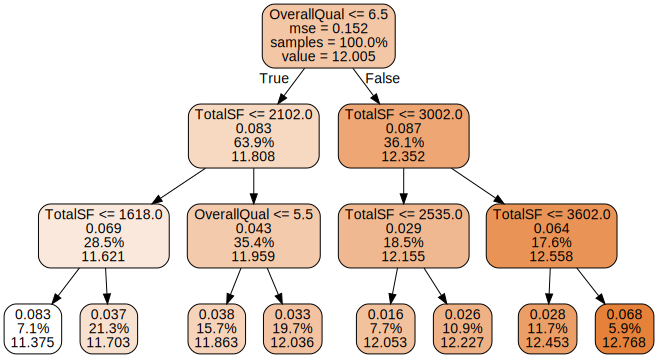

In [106]:
#http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
dot_data = tree.export_graphviz(clf, out_file = None, feature_names = s_train.columns, label = 'root', filled = True, impurity = True, proportion = True, rounded = True)
graph = graphviz.Source(dot_data)  
graph

We also report a portion of our results, including the actual sale price and the predicted sale price for the first 20 observations in our dataset. 

In [58]:
results = pd.DataFrame({"Actual": np.exp(y_train), "Predicted": list(np.exp(clf.predict(X_train)))})
results = results.reset_index(drop=True)
results.head(20)

,Actual,Predicted
0,105000.0,120967.531328
1,183000.0,171538.466719
2,138000.0,141854.736477
3,176500.0,168797.484457
4,79000.0,120967.531328
5,98600.0,141854.736477
6,170000.0,171538.466719
7,272000.0,168797.484457
8,125000.0,120967.531328
9,160000.0,168797.484457
